In [1]:
from pyrdf2vec.graphs import KG
import pandas as pd
import rdflib


# Load CSV file with country names and their labels
country_data = pd.read_csv('data/sparql_2021-02-11_21-55-59Z.csv')
entities = country_data['country']
entities.append(country_data['capital'])
label_predicates = [
     'http://dbpedia.org/ontology/abstract',
     'http://dbpedia.org/ontology/flag',
     'http://dbpedia.org/ontology/thumbnail',
     'http://dbpedia.org/ontology/wikiPageExternalLink',
     'http://dbpedia.org/ontology/wikiPageID',
     'http://dbpedia.org/ontology/wikiPageRevisionID',
     'http://dbpedia.org/ontology/wikiPageWikiLink',
     'http://dbpedia.org/property/flagCaption',
     'http://dbpedia.org/property/float',
     'http://dbpedia.org/property/footnoteA',
     'http://dbpedia.org/property/footnoteB',
     'http://dbpedia.org/property/footnoteC',
     'http://dbpedia.org/property/source',
     'http://dbpedia.org/property/width',
     'http://purl.org/dc/terms/subject',
     'http://purl.org/linguistics/gold/hypernym',
     'http://purl.org/voc/vrank#hasRank',
     'http://www.georss.org/georss/point',
     'http://www.w3.org/2000/01/rdf-schema#comment',
     'http://www.w3.org/2000/01/rdf-schema#label',
     'http://www.w3.org/2000/01/rdf-schema#seeAlso',
     'http://www.w3.org/2002/07/owl#sameAs',
     'http://www.w3.org/2003/01/geo/wgs84_pos#geometry',
     'http://dbpedia.org/ontology/wikiPageRedirects',
     'http://www.w3.org/2003/01/geo/wgs84_pos#lat',
     'http://www.w3.org/2003/01/geo/wgs84_pos#long',
     'http://www.w3.org/2004/02/skos/core#exactMatch',
     'http://www.w3.org/ns/prov#wasDerivedFrom',
     'http://xmlns.com/foaf/0.1/depiction',
     'http://xmlns.com/foaf/0.1/homepage',
     'http://xmlns.com/foaf/0.1/isPrimaryTopicOf',
     'http://xmlns.com/foaf/0.1/name',
     'http://dbpedia.org/property/website',
     'http://dbpedia.org/property/west',
     'http://dbpedia.org/property/wordnet_type',
     'http://www.w3.org/2002/07/owl#differentFrom',
]
# KG Loading Alternative 1: Loading the entire turtle file into memory
kg = KG("data/countries.ttl", file_type='turtle',
        label_predicates=[rdflib.URIRef(x) for x in label_predicates])


In [23]:
print(entities)

['http://dbpedia.org/resource/Luxembourg', 'http://dbpedia.org/resource/Madagascar', 'http://dbpedia.org/resource/Majeerteen_Sultanate', 'http://dbpedia.org/resource/Majeerteen_Sultanate', 'http://dbpedia.org/resource/Malagasy_Republic', 'http://dbpedia.org/resource/Malawi', 'http://dbpedia.org/resource/Malaysia', 'http://dbpedia.org/resource/Malaysia', 'http://dbpedia.org/resource/Maldives', 'http://dbpedia.org/resource/Mali', 'http://dbpedia.org/resource/Uganda', 'http://dbpedia.org/resource/Ukraine', "http://dbpedia.org/resource/Ukrainian_People's_Republic", 'http://dbpedia.org/resource/Ukrainian_Soviet_Socialist_Republic', 'http://dbpedia.org/resource/Ukrainian_Soviet_Socialist_Republic', 'http://dbpedia.org/resource/Unification_of_Norway', 'http://dbpedia.org/resource/Union_between_Sweden_and_Norway', 'http://dbpedia.org/resource/Union_between_Sweden_and_Norway', 'http://dbpedia.org/resource/Union_of_South_Africa', 'http://dbpedia.org/resource/Union_of_South_Africa', 'http://dbped

In [2]:
filtered_entities = [e for e in entities if e in kg._entities]
not_found = set(entities) - set(filtered_entities)
#print(f'{not_found} could not be found in the KG! Removing them...')
entities = filtered_entities

In [38]:
a = ["a", "b", "c"]
b = ["d", "e", "f"]
c = a.append(b)
print("Lower_Canada" in country_data['country'])

False


In [24]:
from pyrdf2vec import RDF2VecTransformer
import numpy as np

transformer = RDF2VecTransformer()
transformer.fit(kg, entities, verbose=True)
walk_embeddings = transformer.transform(entities)
print(len(entities), np.array(walk_embeddings).shape)

Extracted 128271 walks for 645 entities!
645 (645, 100)


In [36]:
print(X_tsne[0:, 0])

[ 2.78926468e+01  2.27237453e+01  9.97872353e+00  1.04257603e+01
 -4.50207253e+01  1.69831047e+01  1.09444094e+01  1.09444294e+01
  2.87827625e+01  2.44841785e+01 -4.07884026e+01  2.13705978e+01
 -4.36206551e+01  2.24947166e+01  2.24952602e+01  1.10134897e+01
  2.72689133e+01  2.72689667e+01  5.99852991e+00  6.15201759e+00
  6.11531782e+00  6.34089708e+00  3.29296570e+01  2.76388550e+01
  2.76387844e+01  9.64675617e+00  4.94808340e+00 -3.57600899e+01
  1.41671066e+01  1.84700108e+01  1.34397783e+01  1.29719019e+01
  2.63906860e+01 -4.16201134e+01 -4.16220245e+01 -4.16239204e+01
  2.70172825e+01  1.87971840e+01  2.44299240e+01  2.77475624e+01
  1.97142792e+01 -4.10663719e+01  2.54825516e+01  2.54825516e+01
 -3.57466927e+01 -4.32726326e+01  2.72890606e+01  1.28037825e+01
  2.27600021e+01  1.78671074e+01  2.13930569e+01  1.57892942e+01
  2.65759106e+01  3.02466583e+01  2.92562008e+01  4.60689902e-01
  2.53437004e+01  1.24993830e+01  8.93052387e+00 -5.01158791e+01
 -5.01121941e+01  2.32902

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 645 samples in 0.016s...
[t-SNE] Computed neighbors for 645 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 645 / 645
[t-SNE] Mean sigma: 0.020379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.396885
[t-SNE] KL divergence after 1000 iterations: 0.610174


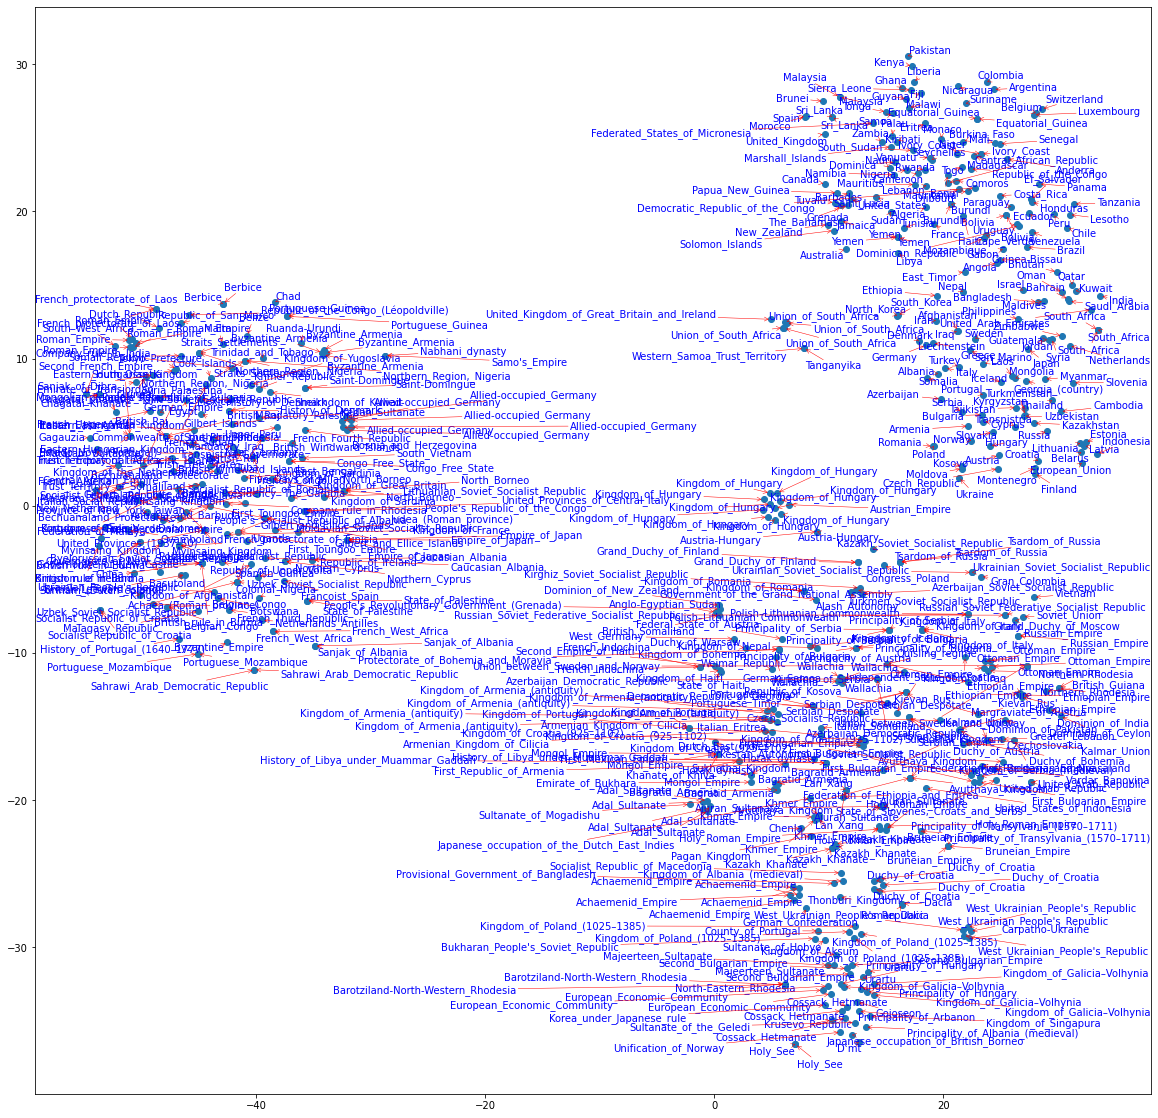

In [26]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

walk_tsne = TSNE(random_state=42, verbose = 1)
X_tsne = walk_tsne.fit_transform(walk_embeddings)

#print(X_tsne)

plt.figure(figsize=(20, 20))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], entities):
    if lab in country_data['country']:
        lab = lab.split('/')[-1]
        text = plt.text(x, y, lab, c='r')
    else:
        lab = lab.split('/')[-1]
        text = plt.text(x, y, lab, c='b')
    texts.append(text)

#print(texts)
adjust_text(texts, lim=15, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

def classify(walk_embeddings):
    for task in ['Research Rating', 'Inflation Rating', 'Continent']:
        
        # Split our data into train and test (50/50 split)
        data = train_test_split(country_data['Country'], country_data[task], stratify=country_data[task], test_size=0.5, random_state=42)
        train_ent, test_ent, y_train, y_test = data
        
        #print(y_test.shape)
        #print("Train/test data:", [[train_ent, y_train],[test_ent, y_test]])
    
        # Create masks that filter out all entities that are INCLUDED in the KG.
        train_mask = [x in entities for x in train_ent]
        test_mask = [x in entities for x in test_ent]

        y_train = y_train[train_mask]
        y_test = y_test[test_mask]
    
        # Create our X_train and X_test which consists out of the created embeddings
        X_train = []
        X_test = []
        for entity in train_ent:
            if entity in entities:
                X_train.append(walk_embeddings[entities.index(entity)])
        for entity in test_ent:
            if entity in entities:
                X_test.append(walk_embeddings[entities.index(entity)])
        X_train = np.array(X_train)
        X_test = np.array(X_test)
    
        # Fit a Random Forest & tune some of its hyper-parameters
        rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                          {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, None]},
                          cv=10)
        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)
    
        # Evaluate our model on the test data
        print(task)
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        print('Accuracy =', accuracy_score(y_test, preds))
        print(confusion_matrix(y_test, preds))
        #print(walk_embeddings[0])

In [48]:
classify(walk_embeddings)

(80,)
Research Rating
(77, 100) (72, 100) (77,) (72,)
Accuracy = 0.7222222222222222
[[25 13]
 [ 7 27]]
(80,)
Inflation Rating
(76, 100) (73, 100) (76,) (73,)
Accuracy = 0.5616438356164384
[[16 16]
 [16 25]]
(80,)


C:\Users\Angelos\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Continent
(77, 100) (72, 100) (77,) (72,)
Accuracy = 0.6805555555555556
[[15  1  1  2  0]
 [ 5 10  0  2  0]
 [ 1  2  7  3  0]
 [ 1  2  0 17  0]
 [ 0  1  0  2  0]]
